<a href="https://colab.research.google.com/github/plaban1981/POCs/blob/main/Question_answering_(PyTorch)_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 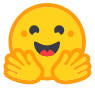Question answering (PyTorch)

Install the Transformers and Datasets libraries to run this notebook.

In [1]:
!pip install datasets transformers
#! pip install accelerate cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl
!apt install git-lfs

     |████████████████████████████████| 298 kB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 40.2 MB/s 
     |████████████████████████████████| 61 kB 500 kB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 132 kB 49.4 MB/s 
     |████████████████████████████████| 243 kB 51.6 MB/s 
     |████████████████████████████████| 596 kB 49.0 MB/s 
     |████████████████████████████████| 3.3 MB 35.8 MB/s 
     |████████████████████████████████| 895 kB 43.2 MB/s 
     |████████████████████████████████| 271 kB 60.7 MB/s 
     |████████████████████████████████| 160 kB 52.8 MB/s 
     |████████████████████████████████| 192 kB 64.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgr

You will need to setup git, adapt your email and name in the following cell.

In [2]:
!git config --global user.email "nayakpplaban@gmail.com"
!git config --global user.name "Plaban81"

You will also need to be logged in to the Hugging Face Hub. Execute the following and enter your credentials.

In [3]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [4]:
from datasets import load_dataset

raw_datasets = load_dataset("squad")

Downloading:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/8.12M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [6]:
print("Context: ", raw_datasets["train"][0]["context"])
print("Question: ", raw_datasets["train"][0]["question"])
print("Answer: ", raw_datasets["train"][0]["answers"])

Context:  Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.
Question:  To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Answer:  {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}


In [7]:
raw_datasets["train"].filter(lambda x: len(x["answers"]["text"]) != 1)

  0%|          | 0/88 [00:00<?, ?ba/s]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 0
})

In [8]:
print(raw_datasets["validation"][0]["answers"])
print(raw_datasets["validation"][2]["answers"])

{'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos'], 'answer_start': [177, 177, 177]}
{'text': ['Santa Clara, California', "Levi's Stadium", "Levi's Stadium in the San Francisco Bay Area at Santa Clara, California."], 'answer_start': [403, 355, 355]}


In [9]:
print(raw_datasets["validation"][2]["context"])
print(raw_datasets["validation"][2]["question"])

Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi's Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.
Where did Super Bowl 50 take place?


In [10]:
from transformers import AutoTokenizer

model_checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [11]:
tokenizer.is_fast

True

In [12]:
context = raw_datasets["train"][0]["context"]
question = raw_datasets["train"][0]["question"]

inputs = tokenizer(question, context)
tokenizer.decode(inputs["input_ids"])

'[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? [SEP] Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive ( and in a direct line that connects through 3 statues and the Gold Dome ), is a simple, modern stone statue of Mary. [SEP]'

In [13]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [14]:
inputs

{'input_ids': [101, 1706, 2292, 1225, 1103, 6567, 2090, 9273, 2845, 1107, 8109, 1107, 10111, 20500, 1699, 136, 102, 22182, 1193, 117, 1103, 1278, 1144, 170, 2336, 1959, 119, 1335, 4184, 1103, 4304, 4334, 112, 188, 2284, 10945, 1110, 170, 5404, 5921, 1104, 1103, 6567, 2090, 119, 13301, 1107, 1524, 1104, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171, 17506, 9538, 1110, 1103, 144, 10595, 2430, 117, 170, 14789, 1282, 1104, 8070, 1105, 9284, 119, 1135, 1110, 170, 16498, 1104, 1103, 176, 10595, 2430, 1120, 10111, 20500, 117, 1699, 1187, 1103, 6567, 2090, 25153, 1193, 1691, 1106, 2216, 17666, 6397, 3786, 1573, 25422, 13149, 1107, 8109, 119, 1335, 1103, 1322, 1104, 1103, 1514, 2797, 113, 1105, 1107, 170, 2904, 1413, 1115, 8200, 1194, 124, 11739, 1105, 11

In [15]:
inputs = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
)

for ids in inputs["input_ids"]:
    print(tokenizer.decode(ids))

[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? [SEP] Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basi [SEP]
[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? [SEP] the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin [SEP]
[CLS] To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France? [SEP] Next to the Main Building is the B

In [16]:
type(inputs)

transformers.tokenization_utils_base.BatchEncoding

In [17]:
inputs

{'input_ids': [[101, 1706, 2292, 1225, 1103, 6567, 2090, 9273, 2845, 1107, 8109, 1107, 10111, 20500, 1699, 136, 102, 22182, 1193, 117, 1103, 1278, 1144, 170, 2336, 1959, 119, 1335, 4184, 1103, 4304, 4334, 112, 188, 2284, 10945, 1110, 170, 5404, 5921, 1104, 1103, 6567, 2090, 119, 13301, 1107, 1524, 1104, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171, 17506, 102], [101, 1706, 2292, 1225, 1103, 6567, 2090, 9273, 2845, 1107, 8109, 1107, 10111, 20500, 1699, 136, 102, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171

In [18]:
for k in inputs.keys():
  print(f'{k}:{inputs[k]}')

input_ids:[[101, 1706, 2292, 1225, 1103, 6567, 2090, 9273, 2845, 1107, 8109, 1107, 10111, 20500, 1699, 136, 102, 22182, 1193, 117, 1103, 1278, 1144, 170, 2336, 1959, 119, 1335, 4184, 1103, 4304, 4334, 112, 188, 2284, 10945, 1110, 170, 5404, 5921, 1104, 1103, 6567, 2090, 119, 13301, 1107, 1524, 1104, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171, 17506, 102], [101, 1706, 2292, 1225, 1103, 6567, 2090, 9273, 2845, 1107, 8109, 1107, 10111, 20500, 1699, 136, 102, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171, 17

In [19]:
inputs = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'offset_mapping', 'overflow_to_sample_mapping'])

In [20]:
for k in inputs.keys():
  print(f'{k}:{inputs[k]}')

input_ids:[[101, 1706, 2292, 1225, 1103, 6567, 2090, 9273, 2845, 1107, 8109, 1107, 10111, 20500, 1699, 136, 102, 22182, 1193, 117, 1103, 1278, 1144, 170, 2336, 1959, 119, 1335, 4184, 1103, 4304, 4334, 112, 188, 2284, 10945, 1110, 170, 5404, 5921, 1104, 1103, 6567, 2090, 119, 13301, 1107, 1524, 1104, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171, 17506, 102], [101, 1706, 2292, 1225, 1103, 6567, 2090, 9273, 2845, 1107, 8109, 1107, 10111, 20500, 1699, 136, 102, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171, 17

In [21]:
inputs["overflow_to_sample_mapping"]

[0, 0, 0, 0]

In [22]:
inputs = tokenizer(
    raw_datasets["train"][2:6]["question"],
    raw_datasets["train"][2:6]["context"],
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)

print(f"The 4 examples gave {len(inputs['input_ids'])} features.")
print(f"Here is where each comes from: {inputs['overflow_to_sample_mapping']}.")

The 4 examples gave 19 features.
Here is where each comes from: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3].


As we can see, the first three examples (at indices 2, 3, and 4 in the training set) each gave four features and the last example (at index 5 in the training set) gave 7 features.

This information will be useful to map each feature we get to its corresponding label. As mentioned earlier, those labels are:

(0, 0) if the answer is not in the corresponding span of the context
(start_position, end_position) if the answer is in the corresponding span of the context, with start_position being the index of the token (in the input IDs) at the start of the answer and end_position being the index of the token (in the input IDs) where the answer ends
To determine which of these is the case and, if relevant, the positions of the tokens, we first find the indices that start and end the context in the input IDs. We could use the token type IDs to do this, but since those do not necessarily exist for all models **(DistilBERT does not require them, for instance), we’ll instead use the sequence_ids() method of the BatchEncoding our tokenizer returns**.

In [23]:
tokenizer.sep_token_id

102

In [24]:
inputs['input_ids'][0].index(tokenizer.sep_token_id)

16

In [25]:
for k in inputs.keys():
  print(f'{k}:{inputs[k]}')
for i in range(len(inputs['input_ids'])):
    print(f"first instance of SEP tokens in feature {i +1}:{inputs['input_ids'][i].index(tokenizer.sep_token_id)}")

input_ids:[[101, 1109, 19349, 1104, 1103, 11373, 1762, 1120, 10360, 8022, 1110, 3148, 1106, 1134, 2401, 136, 102, 22182, 1193, 117, 1103, 1278, 1144, 170, 2336, 1959, 119, 1335, 4184, 1103, 4304, 4334, 112, 188, 2284, 10945, 1110, 170, 5404, 5921, 1104, 1103, 6567, 2090, 119, 13301, 1107, 1524, 1104, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171, 17506, 102], [101, 1109, 19349, 1104, 1103, 11373, 1762, 1120, 10360, 8022, 1110, 3148, 1106, 1134, 2401, 136, 102, 1103, 4304, 4334, 1105, 4749, 1122, 117, 1110, 170, 7335, 5921, 1104, 4028, 1114, 1739, 1146, 14089, 5591, 1114, 1103, 7051, 107, 159, 21462, 1566, 24930, 2508, 152, 1306, 3965, 107, 119, 5893, 1106, 1103, 4304, 4334, 1110, 1103, 19349, 1104, 1103, 11373, 4641, 119, 13301, 1481, 1103, 171, 

In [26]:
answers = raw_datasets["train"][2:6]["answers"]
answers

[{'answer_start': [279], 'text': ['the Main Building']},
 {'answer_start': [381], 'text': ['a Marian place of prayer and reflection']},
 {'answer_start': [92], 'text': ['a golden statue of the Virgin Mary']},
 {'answer_start': [248], 'text': ['September 1876']}]

In [27]:
inputs["overflow_to_sample_mapping"][0]

0

In [28]:
answers[0],len(answers[0]["text"][0]),answers[0]["answer_start"][0],answers[0]["answer_start"][0] + len(answers[0]["text"][0])

({'answer_start': [279], 'text': ['the Main Building']}, 17, 279, 296)

In [ ]:
inputs.sequence_ids(0)

[None,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 None,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 None]

In [29]:
answers = raw_datasets["train"][2:6]["answers"]
start_positions = []
end_positions = []

for i, offset in enumerate(inputs["offset_mapping"]):
    sample_idx = inputs["overflow_to_sample_mapping"][i]
    answer = answers[sample_idx]
    start_char = answer["answer_start"][0]
    end_char = answer["answer_start"][0] + len(answer["text"][0])
    sequence_ids = inputs.sequence_ids(i)

    # Find the start and end of the context
    idx = 0
    while sequence_ids[idx] != 1:
        idx += 1
    context_start = idx
    print(f'context_start:{context_start}')
    while sequence_ids[idx] == 1:
        idx += 1
    context_end = idx - 1
    print(f'context_end:{context_end}')

    # If the answer is not fully inside the context, label is (0, 0)
    if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
        start_positions.append(0)
        end_positions.append(0)
    else:
        # Otherwise it's the start and end token positions
        idx = context_start
        while idx <= context_end and offset[idx][0] <= start_char:
            idx += 1
        start_positions.append(idx - 1)

        idx = context_end
        while idx >= context_start and offset[idx][1] >= end_char:
            idx -= 1
        end_positions.append(idx + 1)

start_positions, end_positions

context_start:17
context_end:98
context_start:17
context_end:98
context_start:17
context_end:98
context_start:17
context_end:83
context_start:12
context_end:98
context_start:12
context_end:98
context_start:12
context_end:98
context_start:12
context_end:63
context_start:14
context_end:98
context_start:14
context_end:98
context_start:14
context_end:98
context_start:14
context_end:71
context_start:16
context_end:98
context_start:16
context_end:98
context_start:16
context_end:98
context_start:16
context_end:98
context_start:16
context_end:98
context_start:16
context_end:98
context_start:16
context_end:80


([83, 51, 19, 0, 0, 64, 27, 0, 34, 0, 0, 0, 67, 34, 0, 0, 0, 0, 0],
 [85, 53, 21, 0, 0, 70, 33, 0, 40, 0, 0, 0, 68, 35, 0, 0, 0, 0, 0])

In [30]:
idx = 0
sample_idx = inputs["overflow_to_sample_mapping"][idx]
answer = answers[sample_idx]["text"][0]

start = start_positions[idx]
end = end_positions[idx]
labeled_answer = tokenizer.decode(inputs["input_ids"][idx][start : end + 1])

print(f"Theoretical answer: {answer}, labels give: {labeled_answer}")

Theoretical answer: the Main Building, labels give: the Main Building


In [31]:
idx = 4
sample_idx = inputs["overflow_to_sample_mapping"][idx]
print(f'sample_idx : {sample_idx}')
answer = answers[sample_idx]["text"][0]
#
start = start_positions[idx]
end = end_positions[idx]
print(f'start position : {start}')
print(f'end position : {end}')
#
labeled_answer = tokenizer.decode(inputs["input_ids"][idx][start : end + 1])
decoded_example = tokenizer.decode(inputs["input_ids"][idx])
print(f"Theoretical answer: {answer}, labels give: {labeled_answer},decoded example: {decoded_example}")

sample_idx : 1
start position : 0
end position : 0
Theoretical answer: a Marian place of prayer and reflection, labels give: [CLS],decoded example: [CLS] What is the Grotto at Notre Dame? [SEP] Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend " Venite Ad Me Omnes ". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grot [SEP]


## Function for step by step preprocessing of training data

Since  applied on the whole training dataset we will have to pad every feature to the maximum length we set, as most of the contexts will be long (and the corresponding samples will be split into several features), so there is no real benefit to applying dynamic padding here:

In [32]:
max_length = 384
stride = 128


def preprocess_training_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    sample_map = inputs.pop("overflow_to_sample_mapping")
    print(f"inputs :{inputs}")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        sample_idx = sample_map[i]
        answer = answers[sample_idx]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

* To apply this function to the whole training set, we use the Dataset.map() method with the batched=True flag. 

* It’s necessary here as we are changing the length of the dataset (since one example can give several training features):

In [33]:
raw_datasets["train"].column_names

['id', 'title', 'context', 'question', 'answers']

In [34]:
train_dataset = raw_datasets["train"].map(
    preprocess_training_examples,
    batched=True,
    remove_columns=raw_datasets["train"].column_names,
)
len(raw_datasets["train"]), len(train_dataset)

  0%|          | 0/88 [00:00<?, ?ba/s]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate 

inputs :{'input_ids': [[101, 2627, 1132, 1103, 1178, 2735, 1554, 118, 1159, 11151, 118, 8422, 1468, 1107, 2201, 136, 102, 4242, 118, 7410, 9897, 1116, 1915, 15950, 1107, 1199, 2192, 1104, 1103, 1203, 1291, 117, 12859, 118, 27902, 2201, 117, 1105, 17991, 117, 1112, 1218, 1112, 1155, 1104, 1754, 117, 1235, 1103, 1735, 4936, 1104, 11250, 119, 1220, 1253, 1679, 22398, 1107, 1199, 10059, 9306, 117, 12456, 1107, 6099, 6246, 119, 19448, 1115, 6018, 4554, 11014, 14298, 1665, 5693, 118, 7410, 1235, 1103, 2793, 1763, 1511, 1199, 6854, 7983, 1104, 1103, 9786, 2225, 113, 138, 1732, 2744, 114, 117, 1199, 1970, 1105, 2685, 2170, 113, 1727, 1234, 114, 117, 1199, 7983, 1104, 1203, 6793, 113, 26630, 1358, 114, 117, 1103, 150, 1742, 27647, 1104, 5872, 1105, 16765, 117, 1103, 159, 23372, 1161, 1234, 1104, 4471, 6722, 117, 1105, 170, 8973, 1104, 8362, 7235, 1777, 8436, 7983, 119, 1130, 2201, 117, 1103, 1178, 2735, 1554, 118, 1159, 11151, 118, 8422, 1468, 1132, 1103, 6467, 3293, 1104, 12037, 119, 164, 1954

(87599, 88729)

## Processing the validation data

* In Preprocessing the validation data we do not need to generate labels 

* We need to interpret the predictions of the model into spans of the original context. 

* For this, we will just need to store both the offset mappings and some way to match each created feature to the original example it comes from. 

* Since there is an ID column in the original dataset, we’ll use that ID.

* The offset mappings will contain offsets for the question and the context, but once we’re in the post-processing stage we won’t have any way to know which part of the input IDs corresponded to the context and which part was the question (the sequence_ids() method we used is available for the output of the tokenizer only). 

* So, we’ll set the offsets corresponding to the question to None:

In [35]:
def preprocess_validation_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        sample_idx = sample_map[i]
        example_ids.append(examples["id"][sample_idx])

        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    inputs["example_id"] = example_ids
    return inputs

##  Apply this function on the whole validation dataset

In [36]:
validation_dataset = raw_datasets["validation"].map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=raw_datasets["validation"].column_names,
)
len(raw_datasets["validation"]), len(validation_dataset)

  0%|          | 0/11 [00:00<?, ?ba/s]

(10570, 10822)

Since we have not trained our model yet, we are going to use the default model for the QA pipeline to generate some predictions on a small part of the validation set. We can use the same processing function as before; because it relies on the global constant tokenizer, we just have to change that object to the tokenizer of the model we want to use temporarily:

In [37]:
small_eval_set = raw_datasets["validation"].select(range(100))
trained_checkpoint = "distilbert-base-cased-distilled-squad"

tokenizer = AutoTokenizer.from_pretrained(trained_checkpoint)
eval_set = small_eval_set.map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=raw_datasets["validation"].column_names,
)

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [38]:
model_checkpoint

'bert-base-cased'

* Now that the preprocessing is done, we change the tokenizer back to the one we originally picked:

In [39]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

* We then remove the columns of our eval_set that are not expected by the model, build a batch with all of that small validation set, and pass it through the model. If a GPU is available, we use it to go faster:

In [40]:
eval_set.column_names

['attention_mask', 'example_id', 'input_ids', 'offset_mapping']

In [41]:
import torch
from transformers import AutoModelForQuestionAnswering

eval_set_for_model = eval_set.remove_columns(["example_id", "offset_mapping"])
eval_set_for_model.set_format("torch")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch = {k: eval_set_for_model[k].to(device) for k in eval_set_for_model.column_names}
trained_model = AutoModelForQuestionAnswering.from_pretrained(trained_checkpoint).to(device)
print(f"Batch : {batch}")
with torch.no_grad():
    outputs = trained_model(**batch)

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Batch : {'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0'), 'input_ids': tensor([[  101,  5979,  4279,  ...,     0,     0,     0],
        [  101,  5979,  4279,  ...,     0,     0,     0],
        [  101,  2777,  1225,  ...,     0,     0,     0],
        ...,
        [  101,  1327,  1160,  ...,     0,     0,     0],
        [  101,  2627,  3012,  ...,     0,     0,     0],
        [  101,  2627, 21188,  ...,     0,     0,     0]], device='cuda:0')}


* Since the Trainer will give us predictions as NumPy arrays, we grab the start and end logits and convert them to that format:

In [42]:
start_logits = outputs.start_logits.cpu().numpy()
end_logits = outputs.end_logits.cpu().numpy()

In [43]:
start_logits

array([[ -2.2607281,  -5.1783223,  -5.270894 , ...,  -9.524326 ,
         -9.518311 ,  -9.528757 ],
       [ -2.5960708,  -5.548206 ,  -5.5313296, ...,  -9.959747 ,
         -9.953271 ,  -9.986045 ],
       [ -3.7127378,  -7.1848397,  -8.538836 , ..., -11.6557045,
        -11.657144 , -11.650545 ],
       ...,
       [ -2.0260253,  -4.4166584,  -4.498001 , ...,  -8.147886 ,
         -8.153043 ,  -8.175957 ],
       [ -4.1552944,  -5.8304195,  -7.164263 , ..., -10.525519 ,
        -10.525085 , -10.489031 ],
       [ -3.2000206,  -5.8162055,  -6.7249393, ...,  -9.493471 ,
         -9.503821 ,  -9.487102 ]], dtype=float32)

In [44]:
eval_set

Dataset({
    features: ['attention_mask', 'example_id', 'input_ids', 'offset_mapping'],
    num_rows: 100
})

In [46]:
eval_set['example_id'][:5]

['56be4db0acb8001400a502ec',
 '56be4db0acb8001400a502ed',
 '56be4db0acb8001400a502ee',
 '56be4db0acb8001400a502ef',
 '56be4db0acb8001400a502f0']

In [49]:
import collections

example_to_features = collections.defaultdict(list)
for idx, feature in enumerate(eval_set):
    example_to_features[feature["example_id"]].append(idx)

In [ ]:
example_to_features

defaultdict(list,
            {'56be4db0acb8001400a502ec': [0],
             '56be4db0acb8001400a502ed': [1],
             '56be4db0acb8001400a502ee': [2],
             '56be4db0acb8001400a502ef': [3],
             '56be4db0acb8001400a502f0': [4],
             '56be4e1facb8001400a502f6': [30],
             '56be4e1facb8001400a502f9': [31],
             '56be4e1facb8001400a502fa': [32],
             '56be4eafacb8001400a50302': [55],
             '56be4eafacb8001400a50303': [56],
             '56be4eafacb8001400a50304': [57],
             '56be5333acb8001400a5030a': [80],
             '56be5333acb8001400a5030b': [81],
             '56be5333acb8001400a5030c': [82],
             '56be5333acb8001400a5030d': [83],
             '56be5333acb8001400a5030e': [84],
             '56be8e613aeaaa14008c90d1': [5],
             '56be8e613aeaaa14008c90d2': [6],
             '56be8e613aeaaa14008c90d3': [7],
             '56bea9923aeaaa14008c91b9': [8],
             '56bea9923aeaaa14008c91ba': [9],
     

* Now, we need to find the predicted answer for each example in our small_eval_set. 
* One example may have been split into several features in eval_set, 
* so the first step is to map each example in small_eval_set to the corresponding features in eval_set:

* Noe we will look at the logit scores for the n_best start logits and end logits, excluding positions that give:

    - An answer that wouldn’t be inside the context
    - An answer with negative length
    - An answer that is too long (we limit the possibilities at max_answer_length=30)

In [47]:
small_eval_set.column_names

['id', 'title', 'context', 'question', 'answers']

In [50]:
import numpy as np

n_best = 20
max_answer_length = 30
predicted_answers = []

for example in small_eval_set:
    example_id = example["id"]
    context = example["context"]
    answers = []

    for feature_index in example_to_features[example_id]:
        start_logit = start_logits[feature_index]
        end_logit = end_logits[feature_index]
        offsets = eval_set["offset_mapping"][feature_index]

        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        for start_index in start_indexes:
            for end_index in end_indexes:
                # Skip answers that are not fully in the context
                if offsets[start_index] is None or offsets[end_index] is None:
                    continue
                # Skip answers with a length that is either < 0 or > max_answer_length.
                if (
                    end_index < start_index
                    or end_index - start_index + 1 > max_answer_length
                ):
                    continue

                answers.append(
                    {
                        "text": context[offsets[start_index][0] : offsets[end_index][1]],
                        "logit_score": start_logit[start_index] + end_logit[end_index],
                    }
                )

    best_answer = max(answers, key=lambda x: x["logit_score"])
    predicted_answers.append({"id": example_id, "prediction_text": best_answer["text"]})

In [51]:
from datasets import load_metric

metric = load_metric("squad")

Downloading:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

This metric expects the predicted answers in the format of a list of dictionaries with one key for the ID of the example and one key for the predicted text and the theoretical answers in the format below (a list of dictionaries with one key for the ID of the example and one key for the possible answers):

In [52]:
theoretical_answers = [
    {"id": ex["id"], "answers": ex["answers"]} for ex in small_eval_set
]

In [53]:
theoretical_answers 

[{'answers': {'answer_start': [177, 177, 177],
   'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']},
  'id': '56be4db0acb8001400a502ec'},
 {'answers': {'answer_start': [249, 249, 249],
   'text': ['Carolina Panthers', 'Carolina Panthers', 'Carolina Panthers']},
  'id': '56be4db0acb8001400a502ed'},
 {'answers': {'answer_start': [403, 355, 355],
   'text': ['Santa Clara, California',
    "Levi's Stadium",
    "Levi's Stadium in the San Francisco Bay Area at Santa Clara, California."]},
  'id': '56be4db0acb8001400a502ee'},
 {'answers': {'answer_start': [177, 177, 177],
   'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos']},
  'id': '56be4db0acb8001400a502ef'},
 {'answers': {'answer_start': [488, 488, 521],
   'text': ['gold', 'gold', 'gold']},
  'id': '56be4db0acb8001400a502f0'},
 {'answers': {'answer_start': [487, 521, 487],
   'text': ['"golden anniversary"', 'gold-themed', '"golden anniversary']},
  'id': '56be8e613aeaaa14008c90d1'},
 {'answers': {'answer_star

In [54]:
print(predicted_answers[0])
print(theoretical_answers[0])

{'id': '56be4db0acb8001400a502ec', 'prediction_text': 'Denver Broncos'}
{'id': '56be4db0acb8001400a502ec', 'answers': {'text': ['Denver Broncos', 'Denver Broncos', 'Denver Broncos'], 'answer_start': [177, 177, 177]}}


In [55]:
metric.compute(predictions=predicted_answers, references=theoretical_answers)

{'exact_match': 83.0, 'f1': 88.25000000000004}

* compute_metrics() function only receives a tuple eval_preds with logits and labels.

In [56]:
from tqdm.auto import tqdm


def compute_metrics(start_logits, end_logits, features, examples):
    example_to_features = collections.defaultdict(list)
    for idx, feature in enumerate(features):
        example_to_features[feature["example_id"]].append(idx)

    predicted_answers = []
    for example in tqdm(examples):
        example_id = example["id"]
        context = example["context"]
        answers = []

        # Loop through all features associated with that example
        for feature_index in example_to_features[example_id]:
            start_logit = start_logits[feature_index]
            end_logit = end_logits[feature_index]
            offsets = features[feature_index]["offset_mapping"]

            start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
            end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
            for start_index in start_indexes:
                for end_index in end_indexes:
                    # Skip answers that are not fully in the context
                    if offsets[start_index] is None or offsets[end_index] is None:
                        continue
                    # Skip answers with a length that is either < 0 or > max_answer_length
                    if (
                        end_index < start_index
                        or end_index - start_index + 1 > max_answer_length
                    ):
                        continue

                    answer = {
                        "text": context[offsets[start_index][0] : offsets[end_index][1]],
                        "logit_score": start_logit[start_index] + end_logit[end_index],
                    }
                    answers.append(answer)

        # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})

    theoretical_answers = [{"id": ex["id"], "answers": ex["answers"]} for ex in examples]
    return metric.compute(predictions=predicted_answers, references=theoretical_answers)

In [57]:
compute_metrics(start_logits, end_logits, eval_set, small_eval_set)

  0%|          | 0/100 [00:00<?, ?it/s]

{'exact_match': 83.0, 'f1': 88.25000000000004}

In [58]:
model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForQuestionAnswering: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-cased and a

In [59]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


## Fine-tuning the model

In [60]:
!pip install transformers[sentencepiece]

     |████████████████████████████████| 1.2 MB 5.1 MB/s 


In [61]:
from transformers import TrainingArguments

args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="no",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=True,
    #push_to_hub=True,
)

In [62]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    tokenizer=tokenizer,
)
trainer.train()

Using amp half precision backend
***** Running training *****
  Num examples = 88729
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 33276


Step,Training Loss
500,2.480800
1000,1.584100
1500,1.446900
2000,1.372700
2500,1.315400
3000,1.239600
3500,1.267600
4000,1.204400
4500,1.202500
5000,1.125700


Saving model checkpoint to bert-finetuned-squad/checkpoint-11092
Configuration saved in bert-finetuned-squad/checkpoint-11092/config.json
Model weights saved in bert-finetuned-squad/checkpoint-11092/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-11092/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-11092/special_tokens_map.json
Saving model checkpoint to bert-finetuned-squad/checkpoint-22184
Configuration saved in bert-finetuned-squad/checkpoint-22184/config.json
Model weights saved in bert-finetuned-squad/checkpoint-22184/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-22184/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-22184/special_tokens_map.json


Step,Training Loss
500,2.480800
1000,1.584100
1500,1.446900
2000,1.372700
2500,1.315400
3000,1.239600
3500,1.267600
4000,1.204400
4500,1.202500
5000,1.125700


Saving model checkpoint to bert-finetuned-squad/checkpoint-33276
Configuration saved in bert-finetuned-squad/checkpoint-33276/config.json
Model weights saved in bert-finetuned-squad/checkpoint-33276/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-33276/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-33276/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=33276, training_loss=0.8299686570826137, metrics={'train_runtime': 12256.1828, 'train_samples_per_second': 21.719, 'train_steps_per_second': 2.715, 'total_flos': 5.216534983896422e+16, 'train_loss': 0.8299686570826137, 'epoch': 3.0})

In [64]:
trainer.predict(validation_dataset)

The following columns in the test set  don't have a corresponding argument in `BertForQuestionAnswering.forward` and have been ignored: example_id, offset_mapping.
***** Running Prediction *****
  Num examples = 10822
  Batch size = 8


PredictionOutput(predictions=(array([[ -9.2  , -10.57 , -10.055, ..., -10.805, -10.83 , -10.79 ],
       [ -9.24 , -10.47 , -10.19 , ..., -10.8  , -10.82 , -10.78 ],
       [ -9.49 ,  -6.863, -10.336, ..., -10.83 , -10.88 , -10.805],
       ...,
       [ -9.77 ,  -9.91 , -10.36 , ..., -10.86 , -10.92 , -10.93 ],
       [ -9.91 , -10.33 , -10.48 , ..., -10.9  , -10.95 , -10.88 ],
       [-10.1  , -10.   , -10.65 , ..., -10.805, -10.84 , -10.85 ]],
      dtype=float16), array([[ -9.28 ,  -9.44 , -10.23 , ..., -10.74 , -10.71 , -10.74 ],
       [ -9.12 ,  -9.805, -10.266, ..., -10.73 , -10.695, -10.72 ],
       [ -9.53 ,  -9.27 , -10.4  , ..., -10.72 , -10.67 , -10.73 ],
       ...,
       [ -9.59 , -10.17 , -10.59 , ..., -10.77 , -10.7  , -10.695],
       [ -9.58 , -10.18 , -10.336, ..., -10.73 , -10.664, -10.75 ],
       [ -9.89 , -10.2  , -10.43 , ..., -10.84 , -10.79 , -10.78 ]],
      dtype=float16)), label_ids=None, metrics={'test_runtime': 172.2072, 'test_samples_per_second': 62.84

In [65]:
predictions, _,_ = trainer.predict(validation_dataset)
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, validation_dataset, raw_datasets["validation"])

The following columns in the test set  don't have a corresponding argument in `BertForQuestionAnswering.forward` and have been ignored: example_id, offset_mapping.
***** Running Prediction *****
  Num examples = 10822
  Batch size = 8


  0%|          | 0/10570 [00:00<?, ?it/s]

{'exact_match': 81.40018921475875, 'f1': 88.90480329814687}

In [ ]:
trainer.push_to_hub(commit_message="Training complete")

'https://huggingface.co/sgugger/bert-finetuned-squad/commit/9dcee1fbc25946a6ed4bb32efb1bd71d5fa90b68'

In [ ]:
from torch.utils.data import DataLoader
from transformers import default_data_collator

train_dataset.set_format("torch")
validation_set = validation_dataset.remove_columns(["example_id", "offset_mapping"])
validation_set.set_format("torch")

train_dataloader = DataLoader(
    train_dataset,
    shuffle=True,
    collate_fn=default_data_collator,
    batch_size=8,
)
eval_dataloader = DataLoader(
    validation_set, collate_fn=default_data_collator, batch_size=8
)

In [ ]:
model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

In [ ]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)

In [ ]:
from accelerate import Accelerator

accelerator = Accelerator(fp16=True)
model, optimizer, train_dataloader, eval_dataloader = accelerator.prepare(
    model, optimizer, train_dataloader, eval_dataloader
)

In [ ]:
from transformers import get_scheduler

num_train_epochs = 3
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = num_train_epochs * num_update_steps_per_epoch

lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)

In [ ]:
from huggingface_hub import Repository, get_full_repo_name

model_name = "bert-finetuned-squad-accelerate"
repo_name = get_full_repo_name(model_name)
repo_name

'sgugger/bert-finetuned-squad-accelerate'

In [ ]:
output_dir = "bert-finetuned-squad-accelerate"
repo = Repository(output_dir, clone_from=repo_name)

In [ ]:
from tqdm.auto import tqdm
import torch

progress_bar = tqdm(range(num_training_steps))

for epoch in range(num_train_epochs):
    # Training
    model.train()
    for step, batch in enumerate(train_dataloader):
        outputs = model(**batch)
        loss = outputs.loss
        accelerator.backward(loss)

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

    # Evaluation
    model.eval()
    start_logits = []
    end_logits = []
    accelerator.print("Evaluation!")
    for batch in tqdm(eval_dataloader):
        with torch.no_grad():
            outputs = model(**batch)

        start_logits.append(accelerator.gather(outputs.start_logits).cpu().numpy())
        end_logits.append(accelerator.gather(outputs.end_logits).cpu().numpy())

    start_logits = np.concatenate(start_logits)
    end_logits = np.concatenate(end_logits)
    start_logits = start_logits[: len(validation_dataset)]
    end_logits = end_logits[: len(validation_dataset)]

    metrics = compute_metrics(
        start_logits, end_logits, validation_dataset, raw_datasets["validation"]
    )
    print(f"epoch {epoch}:", metrics)

    # Save and upload
    accelerator.wait_for_everyone()
    unwrapped_model = accelerator.unwrap_model(model)
    unwrapped_model.save_pretrained(output_dir, save_function=accelerator.save)
    if accelerator.is_main_process:
        tokenizer.save_pretrained(output_dir)
        repo.push_to_hub(
            commit_message=f"Training in progress epoch {epoch}", blocking=False
        )

In [ ]:
accelerator.wait_for_everyone()
unwrapped_model = accelerator.unwrap_model(model)
unwrapped_model.save_pretrained(output_dir, save_function=accelerator.save)

In [ ]:
from transformers import pipeline

# Replace this with your own checkpoint
model_checkpoint = "huggingface-course/bert-finetuned-squad"
question_answerer = pipeline("question-answering", model=model_checkpoint)

context = """
🤗 Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch and TensorFlow — with a seamless integration
between them. It's straightforward to train your models with one before loading them for inference with the other.
"""
question = "Which deep learning libraries back 🤗 Transformers?"
question_answerer(question=question, context=context)

{'score': 0.9979003071784973,
 'start': 78,
 'end': 105,
 'answer': 'Jax, PyTorch and TensorFlow'}